<a href="https://colab.research.google.com/github/zakariatolba/multimedia-p-box-assessment/blob/main/Fashion_Mnist_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.8.0
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<function mount at 0x7f7253105680>
la taile des données y_train (60000, 784)
la taile des données y_train apres (60000, 28, 28)
------------P-box One round for Fashion dataset----------------
P-box One round CML evaluation
1875/1875 [==============================] - 19s 4ms/step - loss: 0.0014 - r_square: 1.0000 - mean_squared_error: 0.0015
Prediction
P-box One round GCBPM evaluation
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0480 - r_square: 1.0000 - mean_squared_error: 0.0725
Prediction
P-box One round Discrete chaos evaluation
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1867 - r_square: 1.0000 - mean_squared_error: 0.3265
Prediction
P-box One round Continuous chaos evaluation
1875/1875 [==============================] - 9s 4ms/step - loss: 2.4533 - r_square: 0.9782 - mean_squar

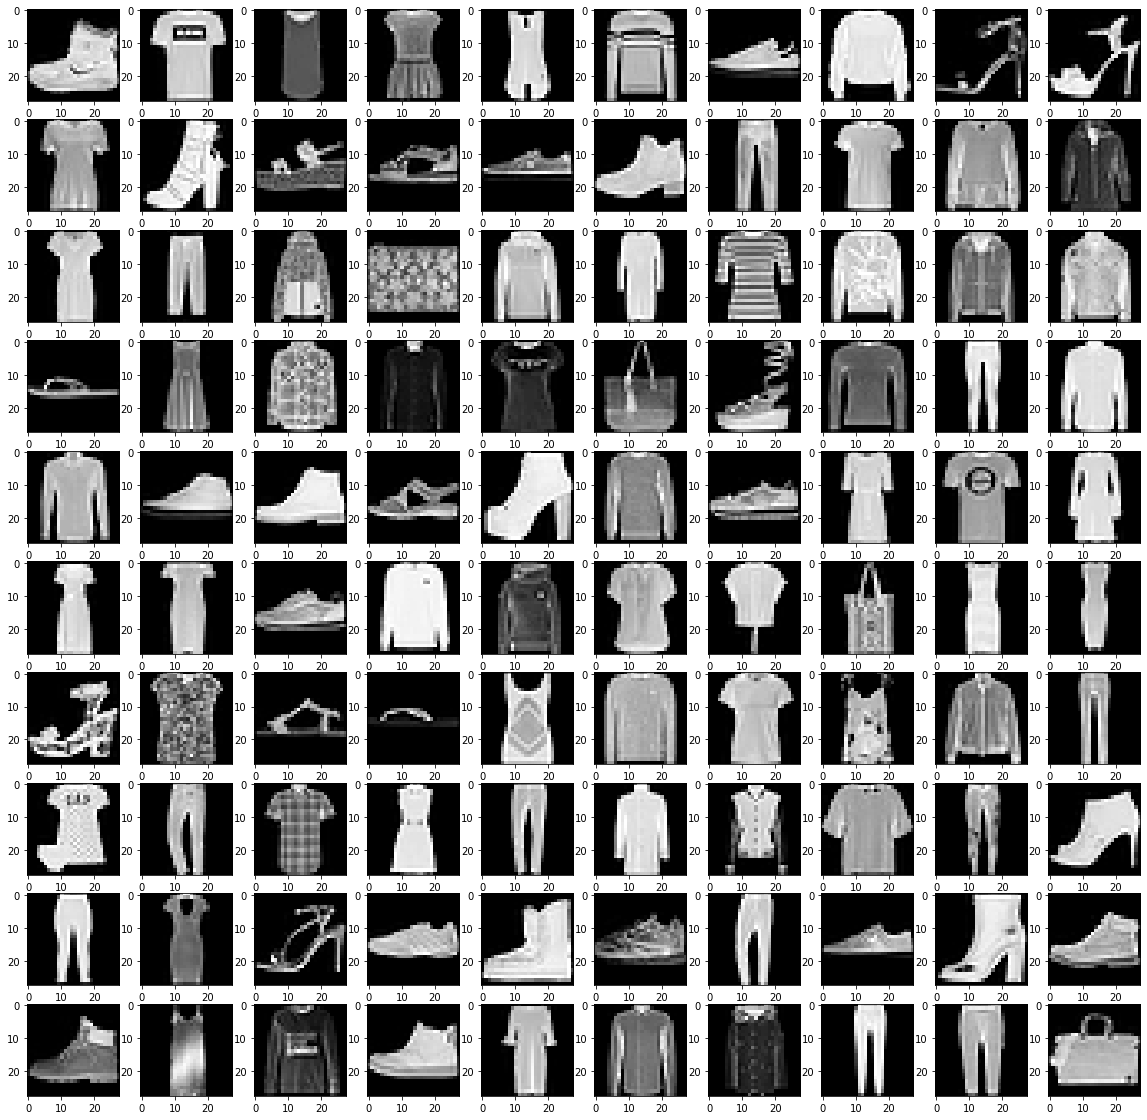

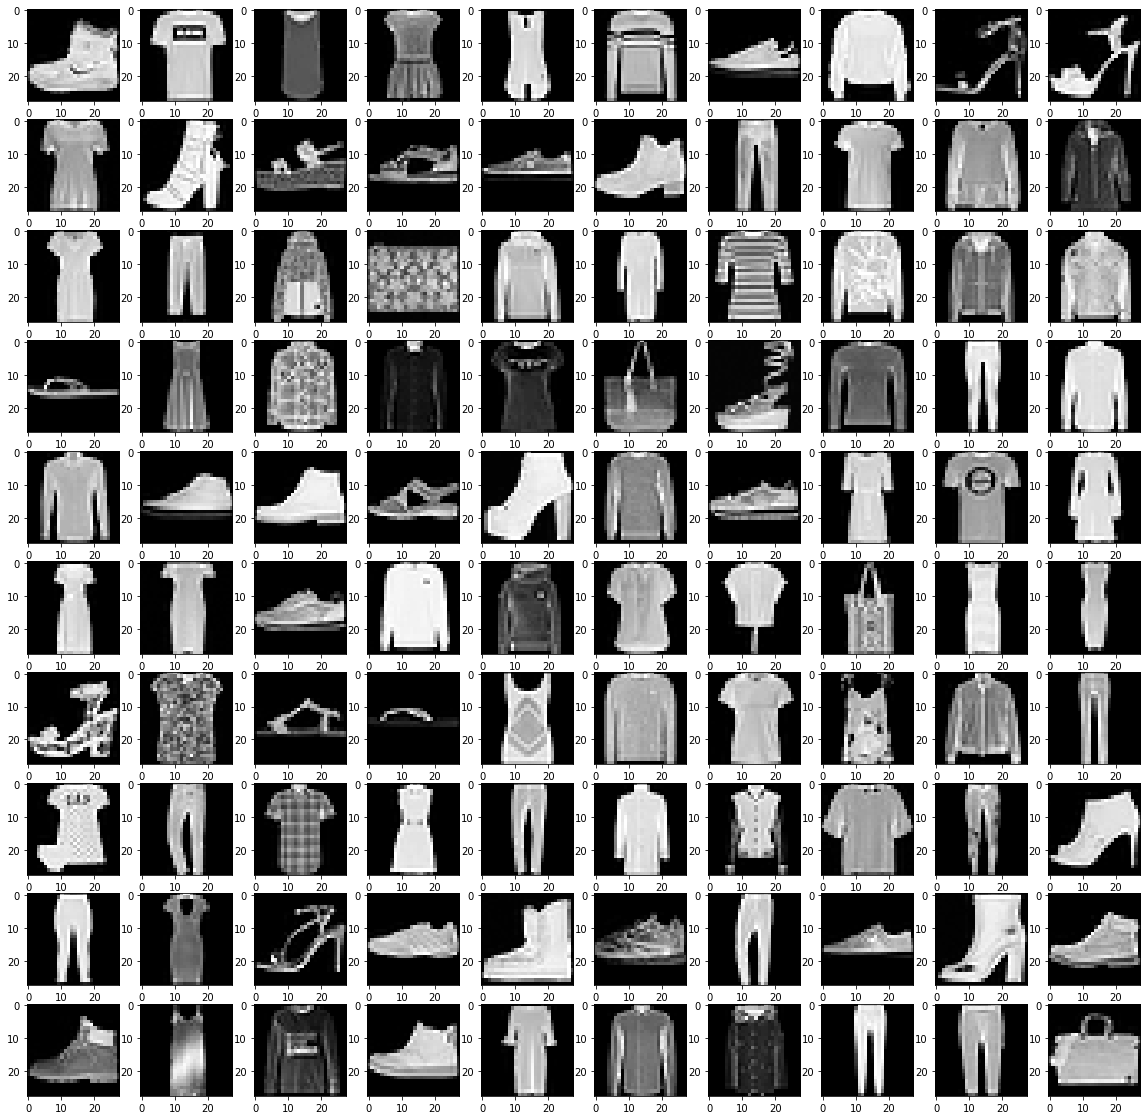

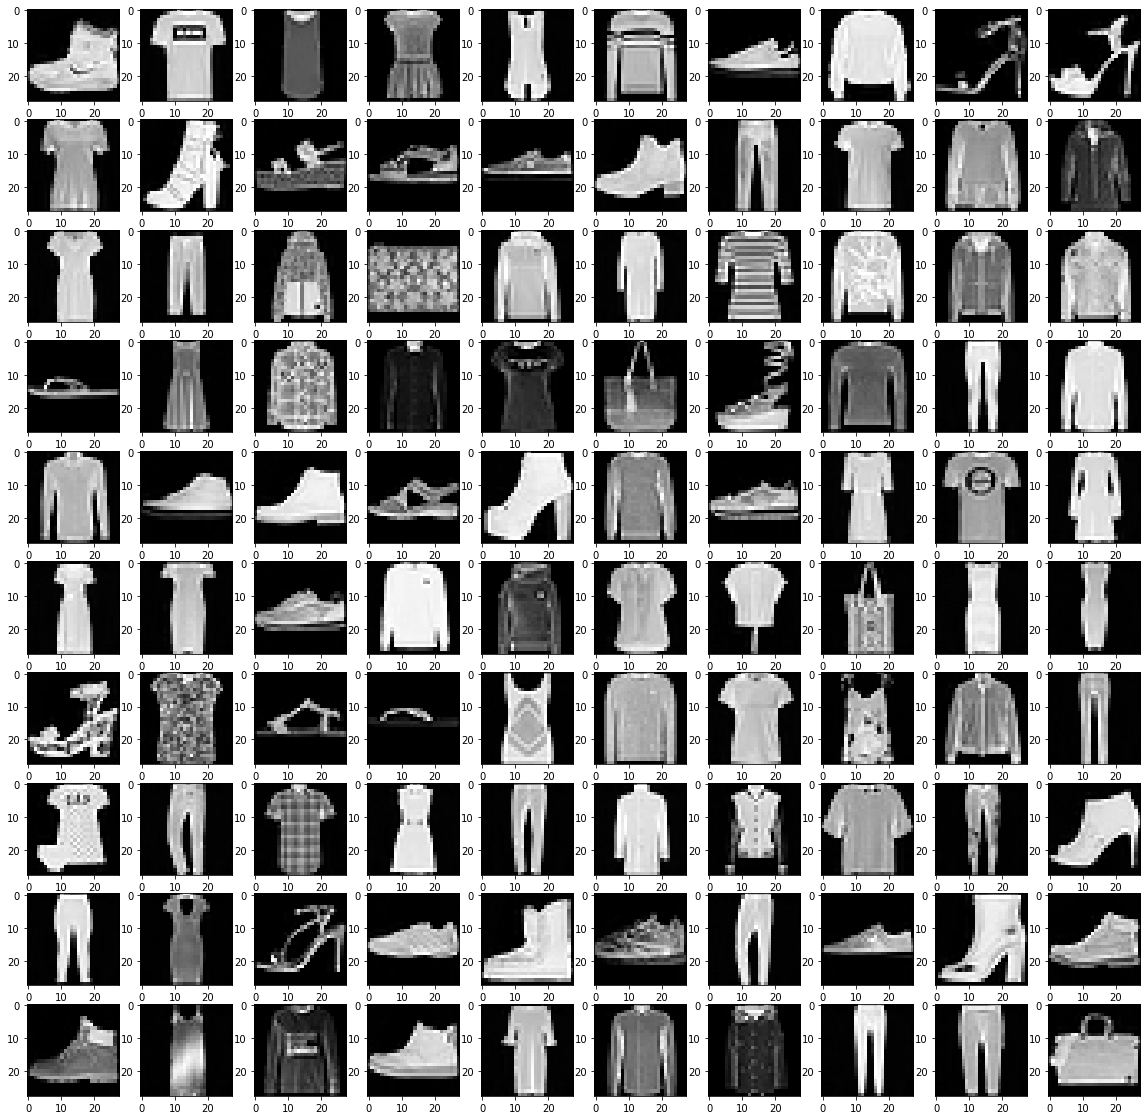

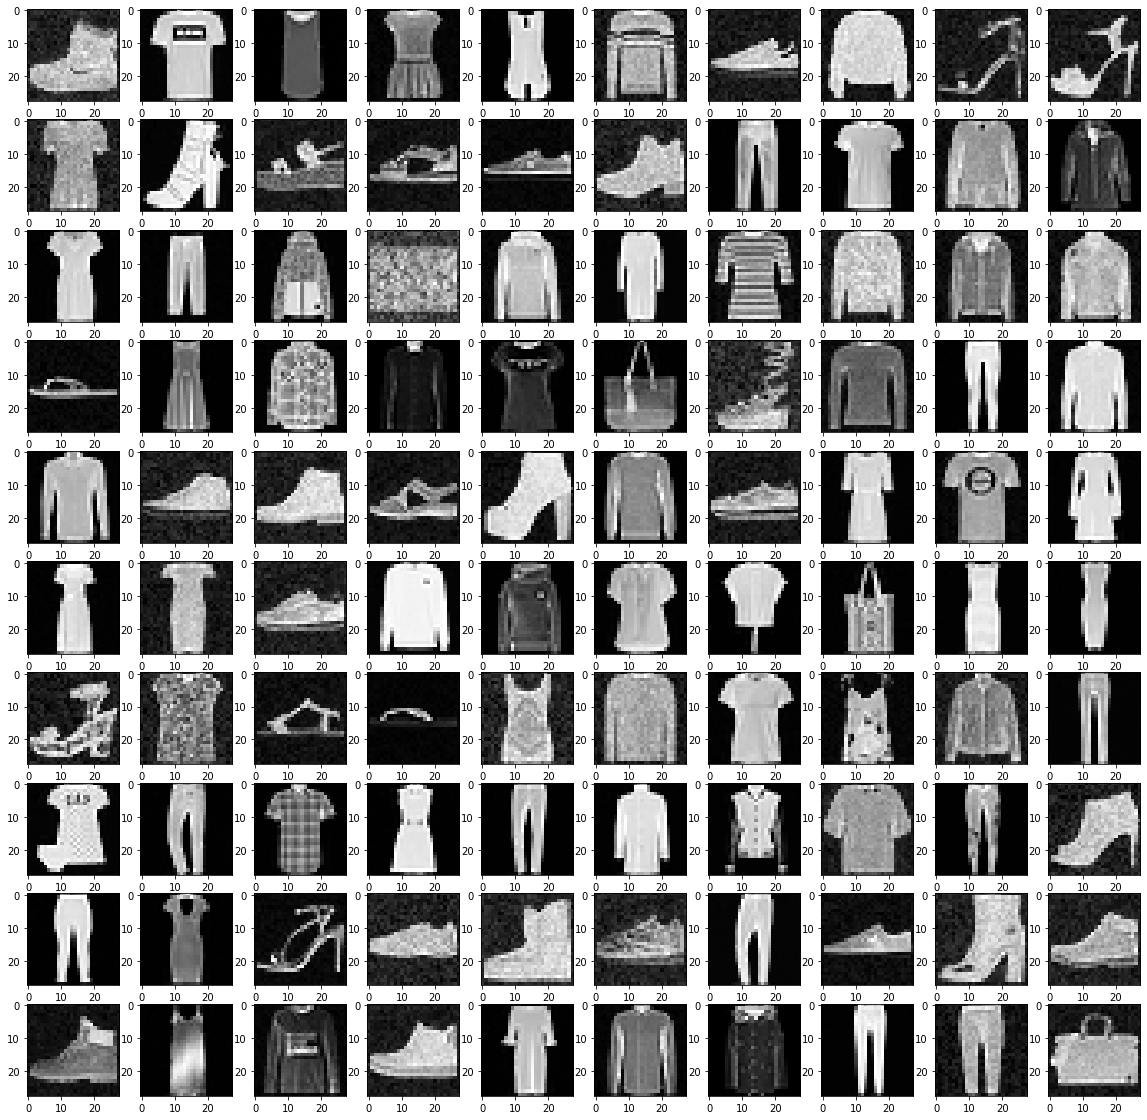

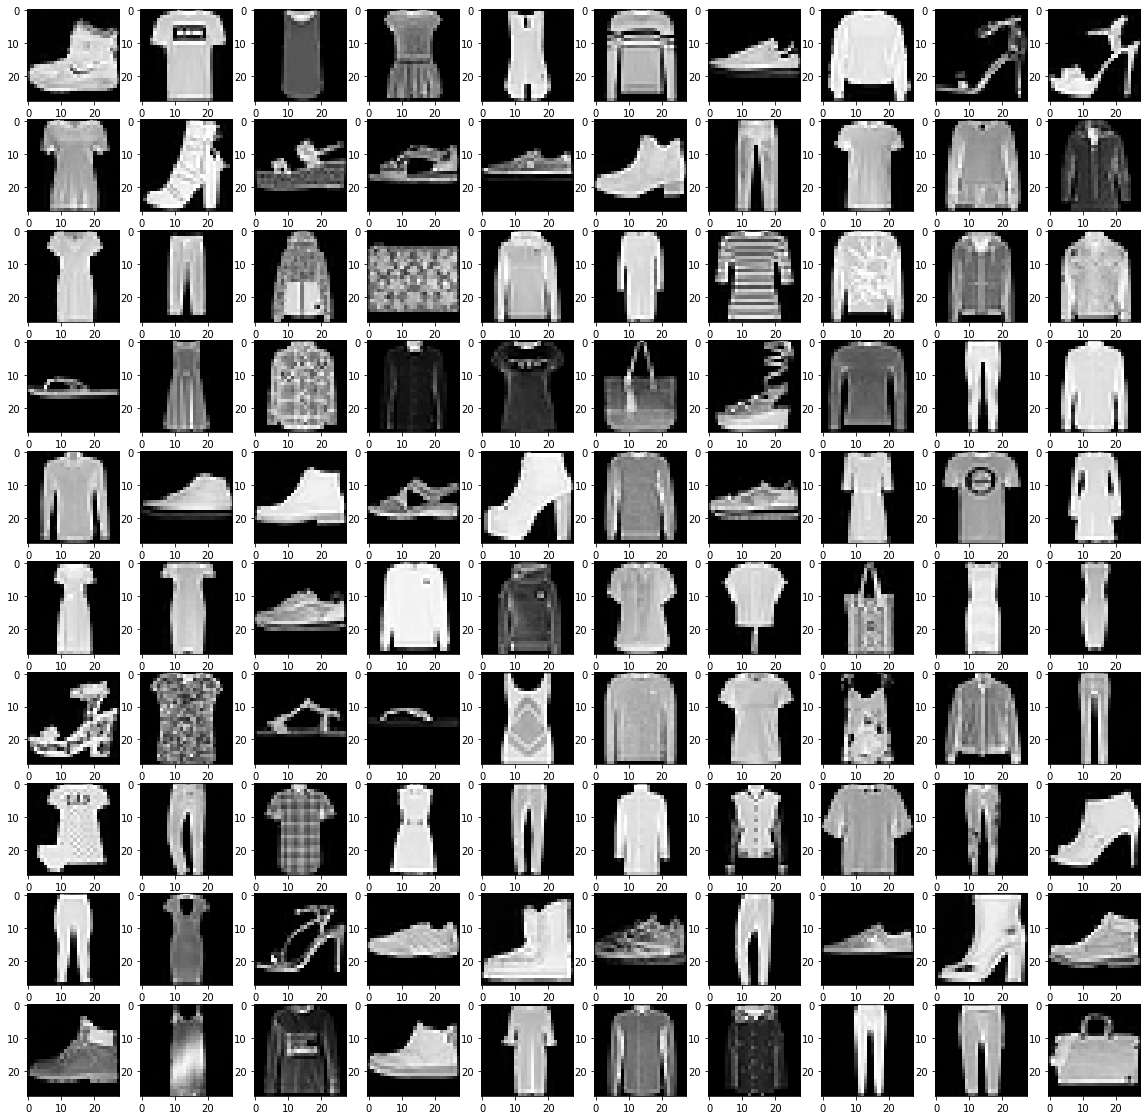

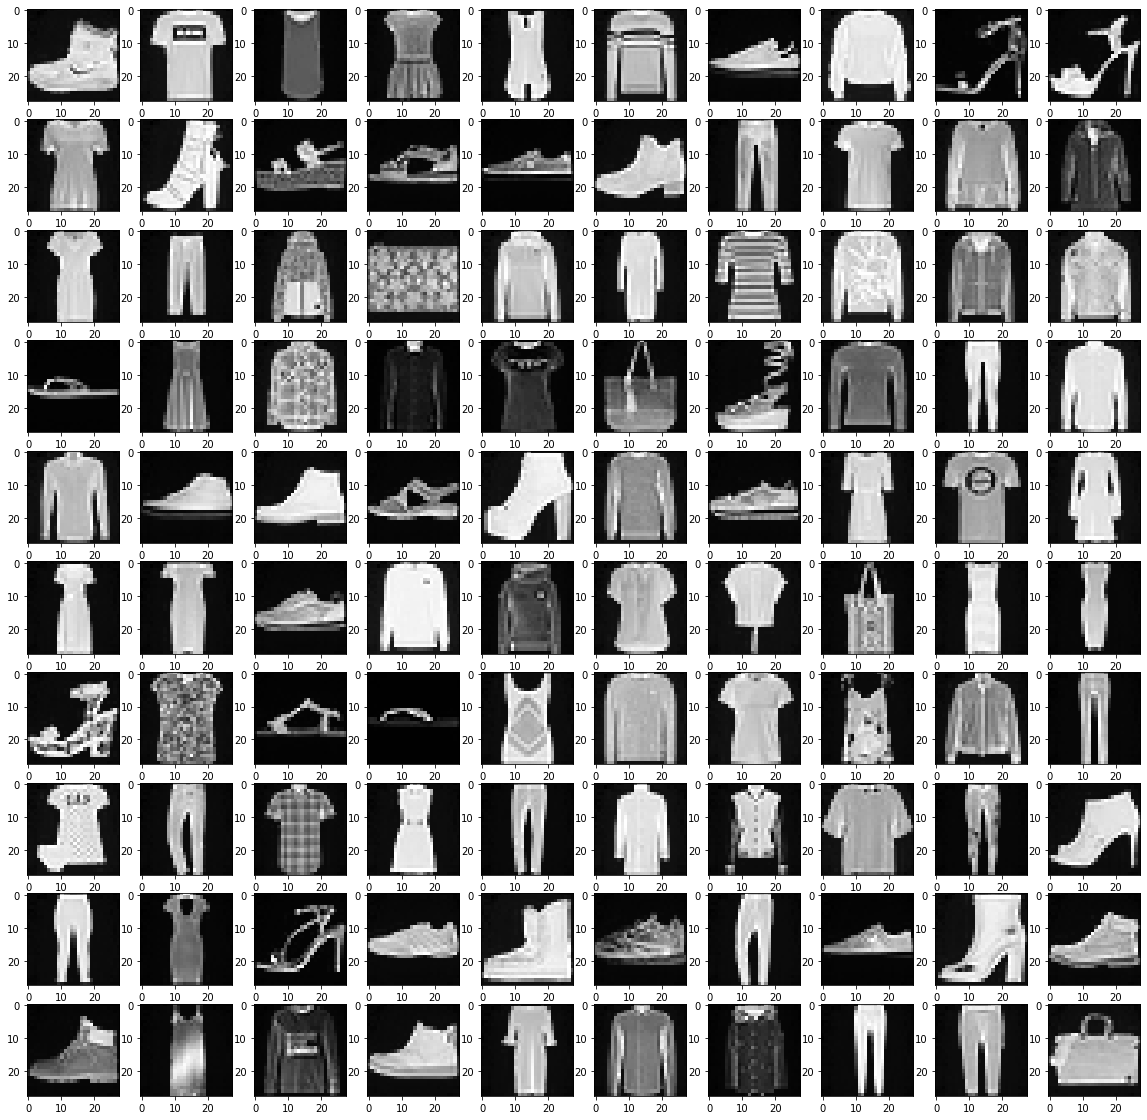

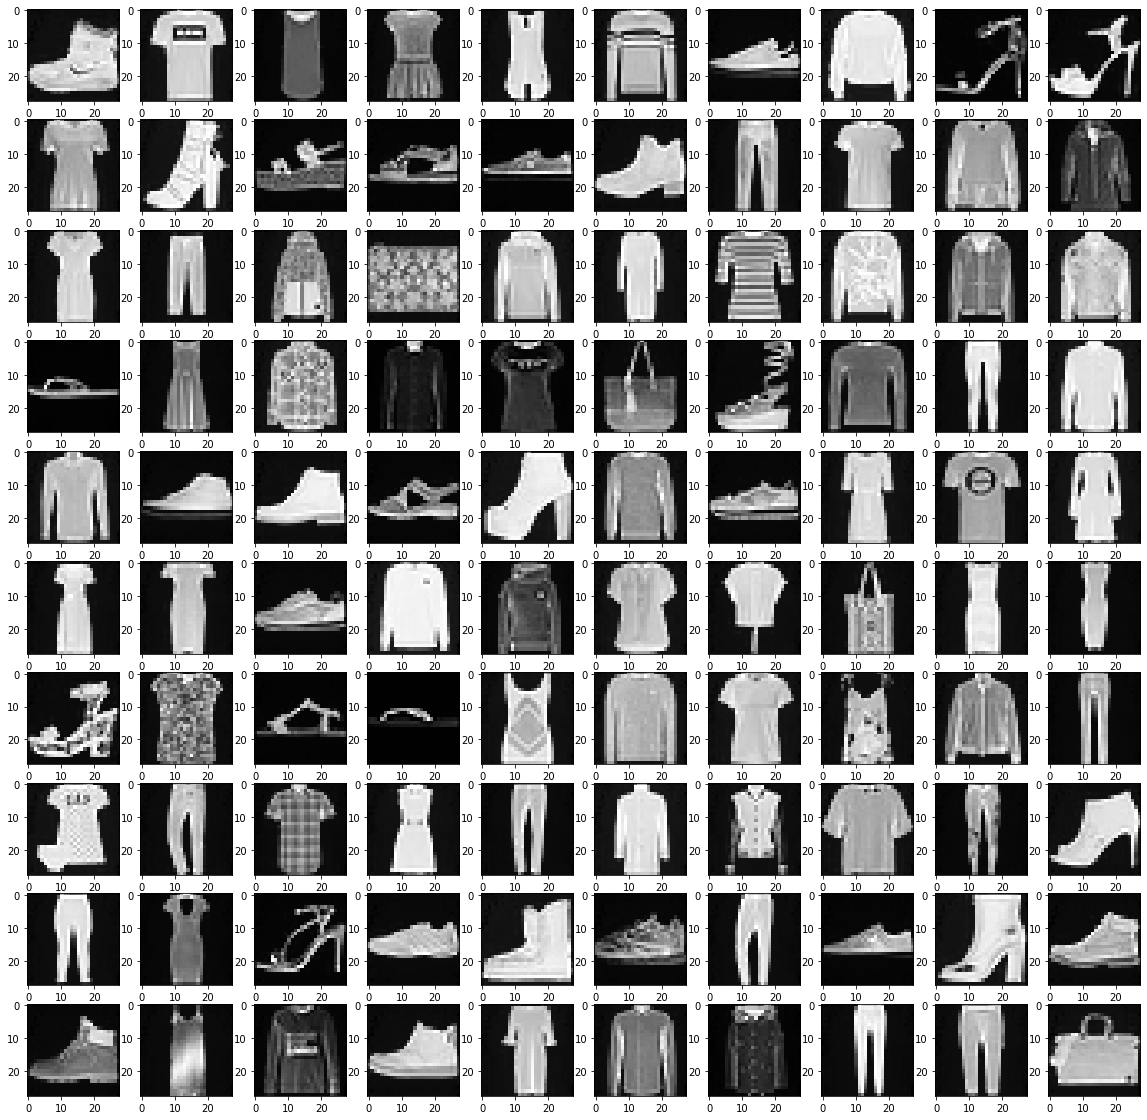

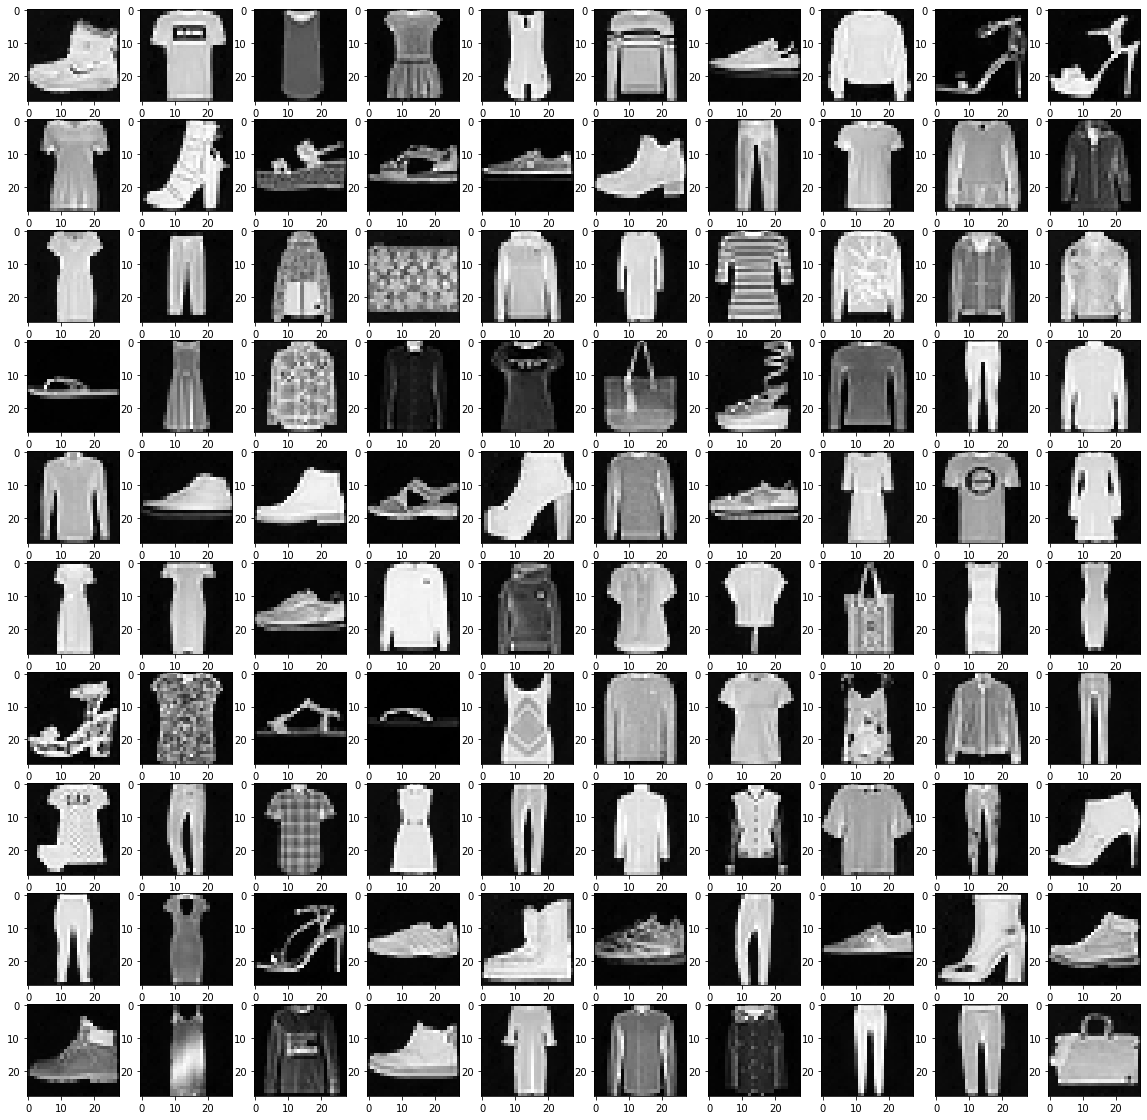

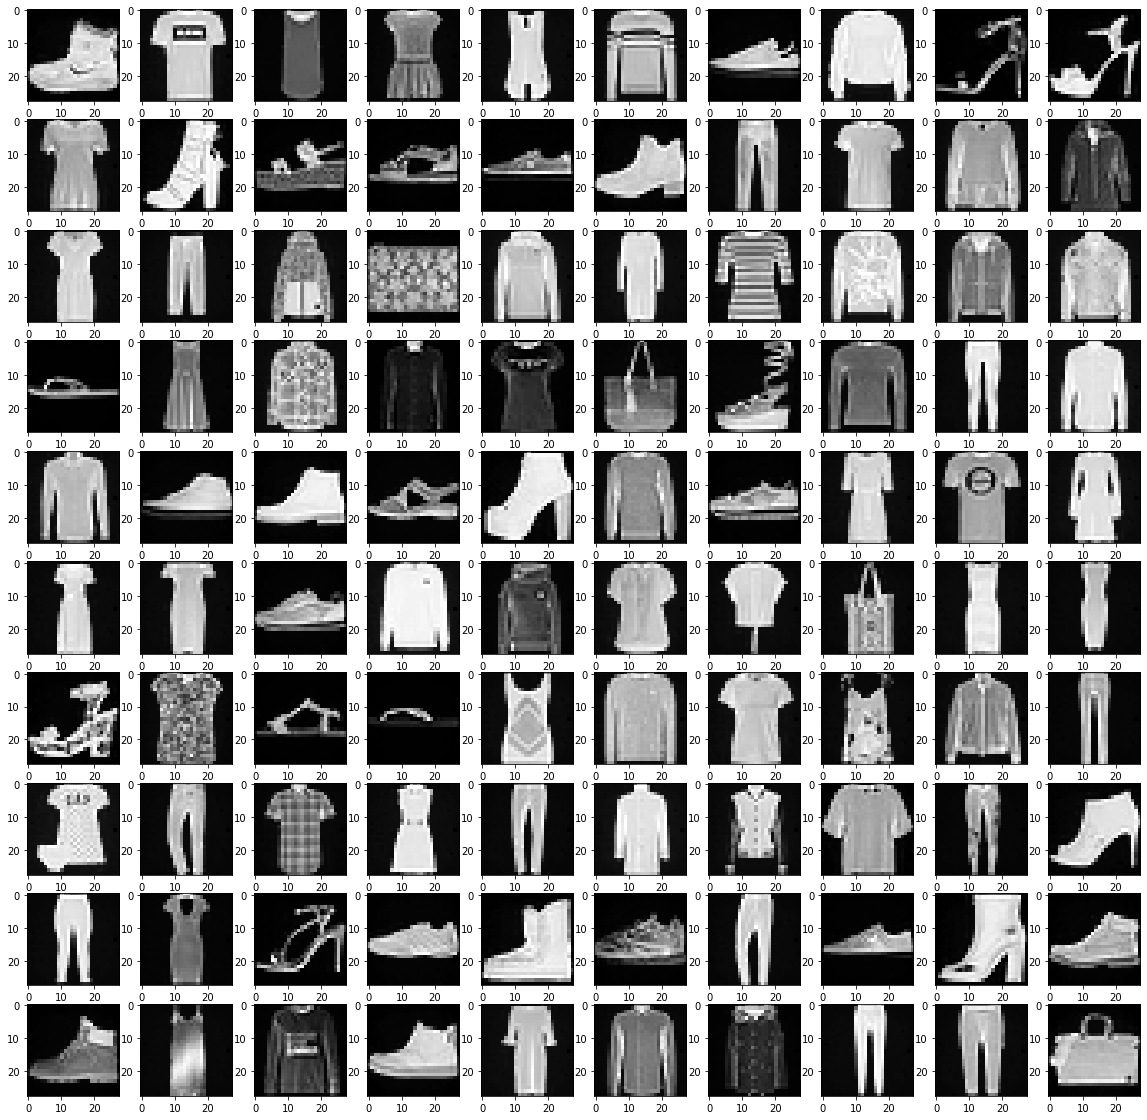

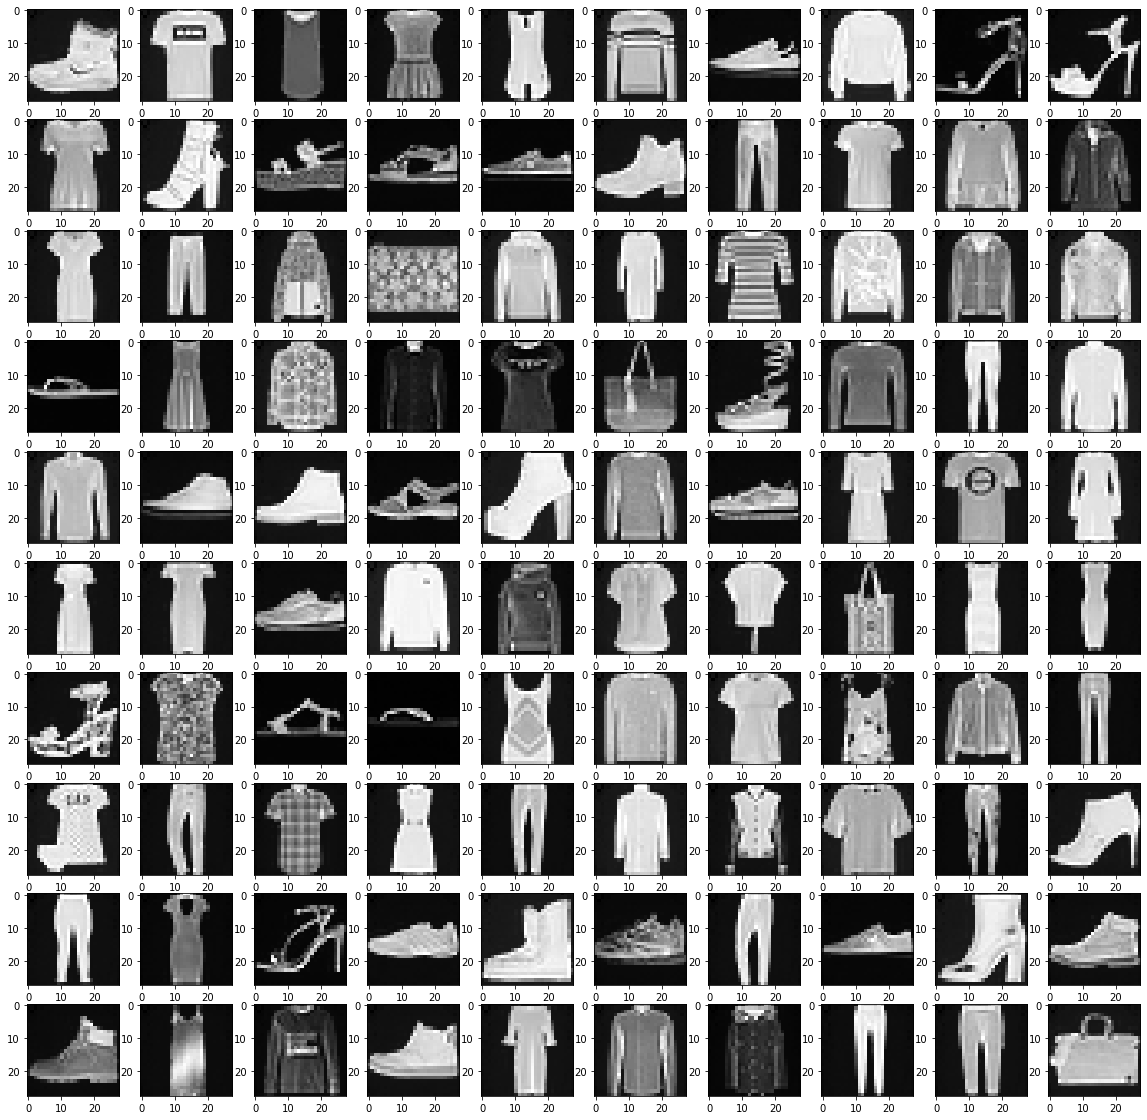

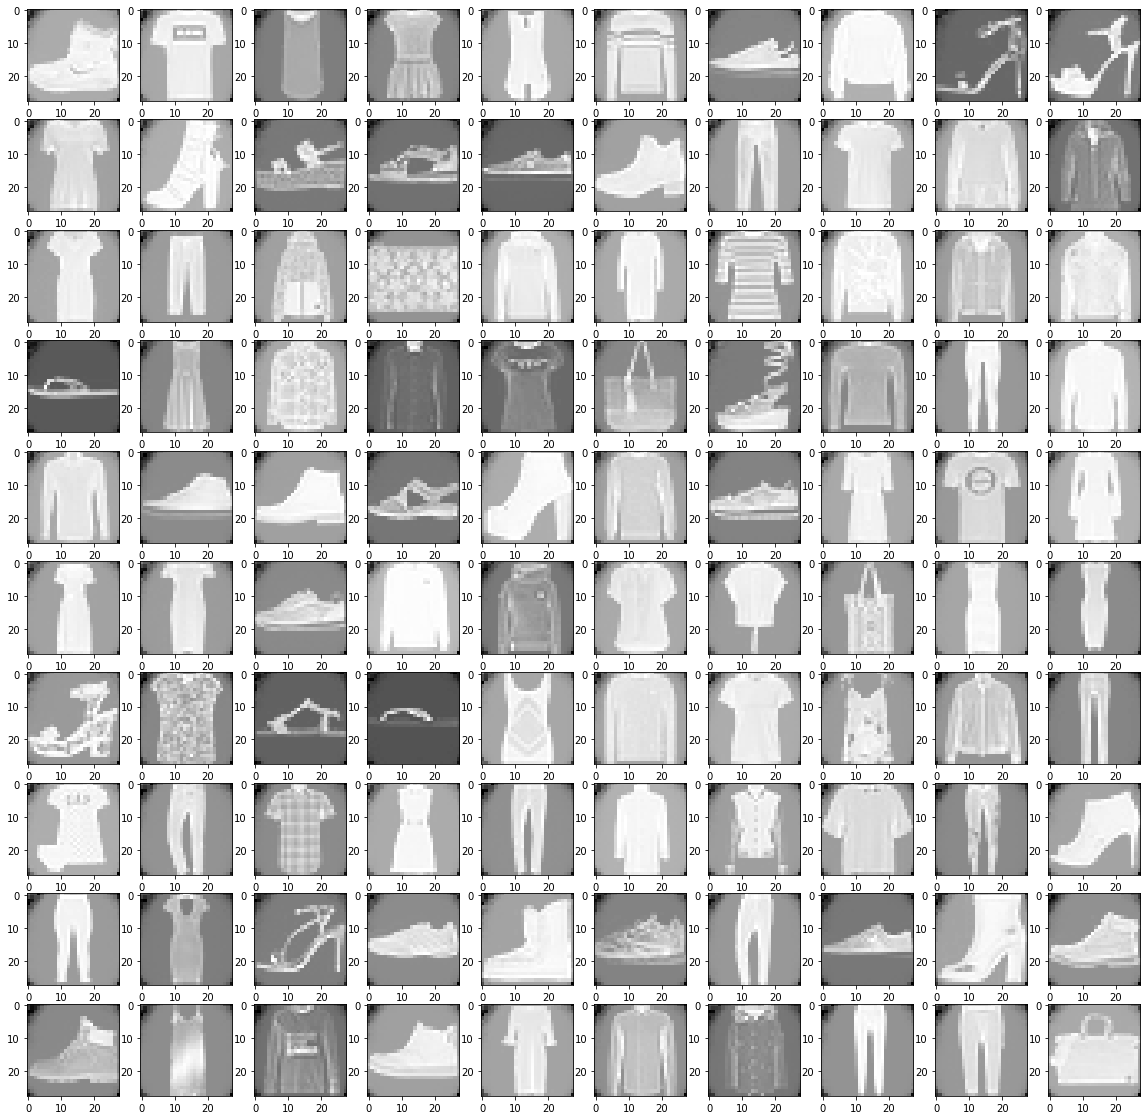

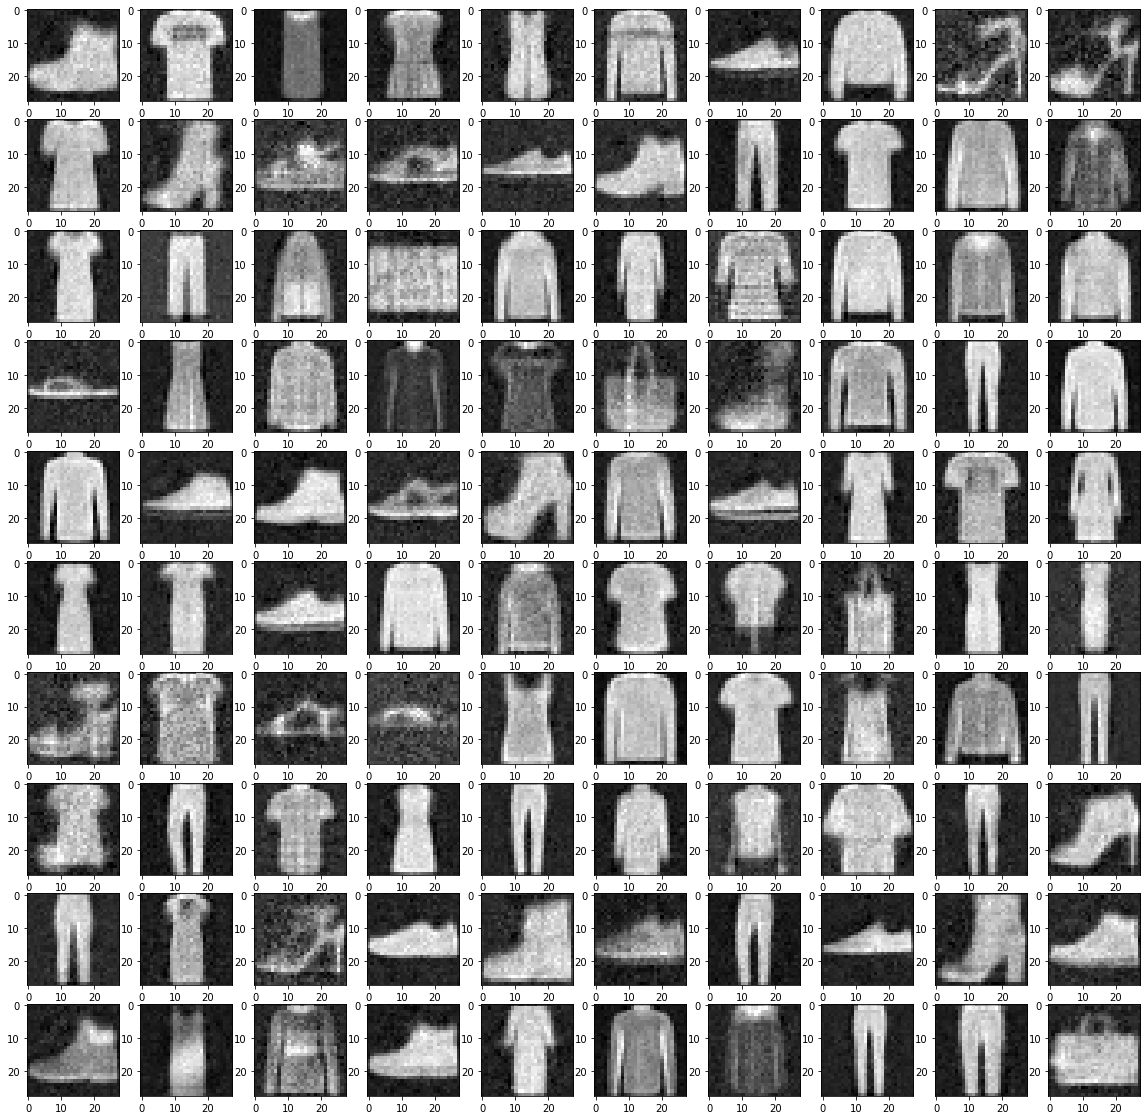

In [1]:
from tensorflow.tools.docs.doc_controls import doc_private
import tensorflow
print(tensorflow.__version__)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import time
from numpy import zeros,array
import sys
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
import sys
import matplotlib.pyplot as plt
import cv2
import csv
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

drive.mount('/content/drive')
model = keras.Sequential()

model = tf.keras.models.load_model('/content/drive/My Drive/P-Box-Black-box-assasement/Model/')

#model.summary()





# mean squared error (mse) for regression
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)

# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))

import keras.backend as K
def tilted_loss(q,y,f):
    e = (y-f)
    return K.mean(K.maximum(q*e, (q-1)*e), axis=-1)

root_logdir = os.path.join(os.curdir, "logs\\fit\\")
def f_predictable(x):
    return x+np.sin(np.pi*x/2)


def f(x, std=0.2):
    return f_predictable(x)+np.random.randn(len(x))*std


def get_data(num, start=0, end=4):
        x = np.sort(np.random.rand(num)*(end-start)+start)
        y = f(x)
        return x.reshape(-1, 1), y
def quantile_loss(q, y, y_p):
        e = y-y_p
        return tf.keras.backend.mean(tf.keras.backend.maximum(q*e, (q-1)*e))        
quantile =0.0

drive.mount('/content/drive')
print(drive.mount)
path1="/content/drive/My Drive/P-Box-Black-box-assasement/Datasets/Fashion Mnist/"
path2="/content/drive/My Drive/P-Box-Black-box-assasement/Datasets/weights/"

y_train = np.loadtxt(path1+'FashionMnist.txt')
print('la taile des données y_train',y_train.shape)
y_train = y_train.reshape((60000,28,28))
print('la taile des données y_train apres',y_train.shape)

print('------------P-box One round for Fashion dataset----------------')

x_train = np.loadtxt(path1+'One-round-CML.txt')
x_train = x_train.reshape((60000,28,28))
model.load_weights("/content/drive/My Drive/P-Box-Black-box-assasement/weights/One round CML.hdf5")
print('P-box One round CML evaluation')
model.compile(optimizer="Adam", loss=lambda y, y_p: quantile_loss(quantile, y, y_p),metrics=[r_square,"mean_squared_error"])
accuracy = model.evaluate(x_train, y_train)
ynew1 = model.predict(x_train)
print('Prediction')     
plt.figure(figsize=(20,20))
for i in range(100):
     plt.subplot(10,10,i+1)
     plt.imshow(ynew1[i].reshape(28,28), cmap=plt.cm.gray)



x_train = np.loadtxt(path1+'One round GCBPM.txt')
x_train = x_train.reshape((60000,28,28))
model.load_weights("/content/drive/My Drive/P-Box-Black-box-assasement/weights/One round GCBPM.hdf5")
print('P-box One round GCBPM evaluation')
model.compile(optimizer="Adam", loss=lambda y, y_p: quantile_loss(quantile, y, y_p),metrics=[r_square,"mean_squared_error"])
accuracy = model.evaluate(x_train, y_train)
ynew2 = model.predict(x_train)
print('Prediction')     
plt.figure(figsize=(20,20))
for i in range(100):
     plt.subplot(10,10,i+1)
     plt.imshow(ynew2[i].reshape(28,28), cmap=plt.cm.gray)

x_train = np.loadtxt(path1+'One round Discrete chaos.txt')
x_train = x_train.reshape((60000,28,28))
model.load_weights("/content/drive/My Drive/P-Box-Black-box-assasement/weights/One round Discrete chaos.hdf5")
print('P-box One round Discrete chaos evaluation')
model.compile(optimizer="Adam", loss=lambda y, y_p: quantile_loss(quantile, y, y_p),metrics=[r_square,"mean_squared_error"])
accuracy = model.evaluate(x_train, y_train)
ynew3 = model.predict(x_train)
print('Prediction')       
plt.figure(figsize=(20,20))
for i in range(100):
     plt.subplot(10,10,i+1)
     plt.imshow(ynew3[i].reshape(28,28), cmap=plt.cm.gray)


x_train = np.loadtxt(path1+'One round Continuous chaos.txt')
x_train = x_train.reshape((60000,28,28))
model.load_weights("/content/drive/My Drive/P-Box-Black-box-assasement/weights/One round Continuous chaos.hdf5")
print('P-box One round Continuous chaos evaluation')
model.compile(optimizer="Adam", loss=lambda y, y_p: quantile_loss(quantile, y, y_p),metrics=[r_square,"mean_squared_error"])
accuracy = model.evaluate(x_train, y_train)
ynew4 = model.predict(x_train)
print('Prediction')        
plt.figure(figsize=(20,20))
for i in range(100):
     plt.subplot(10,10,i+1)
     plt.imshow(ynew4[i].reshape(28,28), cmap=plt.cm.gray)

print('------------P-box 8 rounds for Fashion dataset----------------')

x_train = np.loadtxt(path1+'8 rounds CML.txt')
x_train = x_train.reshape((60000,28,28))
model.load_weights("/content/drive/My Drive/P-Box-Black-box-assasement/weights/8 rounds CML.hdf5")
print('P-box 8 rounds CML evaluation')
model.compile(optimizer="Adam", loss=lambda y, y_p: quantile_loss(quantile, y, y_p),metrics=[r_square,"mean_squared_error"])
accuracy = model.evaluate(x_train, y_train)
ynew5 = model.predict(x_train)
print('Prediction')       
plt.figure(figsize=(20,20))
for i in range(100):
     plt.subplot(10,10,i+1)
     plt.imshow(ynew5[i].reshape(28,28), cmap=plt.cm.gray)


x_train = np.loadtxt(path1+'8 rounds GCBPM.txt')
x_train = x_train.reshape((60000,28,28))
model.load_weights("/content/drive/My Drive/P-Box-Black-box-assasement/weights/8 rounds GCBPM.hdf5")
print('P-box 8 rounds GCBPM evaluation')
model.compile(optimizer="Adam", loss=lambda y, y_p: quantile_loss(quantile, y, y_p),metrics=[r_square,"mean_squared_error"])
accuracy = model.evaluate(x_train, y_train)
ynew6 = model.predict(x_train)
print('Prediction')      
plt.figure(figsize=(20,20))
for i in range(100):
     plt.subplot(10,10,i+1)
     plt.imshow(ynew6[i].reshape(28,28), cmap=plt.cm.gray)


x_train = np.loadtxt(path1+'8 rounds Discrete chaos.txt')
x_train = x_train.reshape((60000,28,28))
model.load_weights("/content/drive/My Drive/P-Box-Black-box-assasement/weights/8 rounds Discrete chaos.hdf5")
print('P-box 8 rounds Discrete chaos evaluation')
model.compile(optimizer="Adam", loss=lambda y, y_p: quantile_loss(quantile, y, y_p),metrics=[r_square,"mean_squared_error"])
accuracy = model.evaluate(x_train, y_train)
ynew7 = model.predict(x_train)
print('Prediction')      
plt.figure(figsize=(20,20))
for i in range(100):
     plt.subplot(10,10,i+1)
     plt.imshow(ynew7[i].reshape(28,28), cmap=plt.cm.gray)


x_train = np.loadtxt(path1+'8 rounds Continuous chaos.txt')
x_train = x_train.reshape((60000,28,28))
model.load_weights("/content/drive/My Drive/P-Box-Black-box-assasement/weights/8 rounds Continuous chaos.hdf5")
print('P-box 8 rounds Continuous chaos evaluation')
model.compile(optimizer="Adam", loss=lambda y, y_p: quantile_loss(quantile, y, y_p),metrics=[r_square,"mean_squared_error"])
accuracy = model.evaluate(x_train, y_train)
ynew8 = model.predict(x_train)
print('Prediction')       
plt.figure(figsize=(20,20))
for i in range(100):
     plt.subplot(10,10,i+1)
     plt.imshow(ynew8[i].reshape(28,28), cmap=plt.cm.gray)


print('------------P-box 16 rounds for Fashion dataset----------------')

x_train = np.loadtxt(path1+'16 rounds CML.txt')
x_train = x_train.reshape((60000,28,28))
model.load_weights("/content/drive/My Drive/P-Box-Black-box-assasement/weights/16 rounds CML.hdf5")
print('P-box 16 rounds CML evaluation')
model.compile(optimizer="Adam", loss=lambda y, y_p: quantile_loss(quantile, y, y_p),metrics=[r_square,"mean_squared_error"])
accuracy = model.evaluate(x_train, y_train)
ynew9 = model.predict(x_train)
print('Prediction')       
plt.figure(figsize=(20,20))
for i in range(100):
     plt.subplot(10,10,i+1)
     plt.imshow(ynew9[i].reshape(28,28), cmap=plt.cm.gray)

x_train = np.loadtxt(path1+'16 rounds GCBPM.txt')
x_train = x_train.reshape((60000,28,28))
model.load_weights("/content/drive/My Drive/P-Box-Black-box-assasement/weights/16 rounds GCBPM.hdf5")
print('P-box 16 rounds GCBPM evaluation')
model.compile(optimizer="Adam", loss=lambda y, y_p: quantile_loss(quantile, y, y_p),metrics=[r_square,"mean_squared_error"])
accuracy = model.evaluate(x_train, y_train)
ynew10 = model.predict(x_train)
print('Prediction')      
plt.figure(figsize=(20,20))
for i in range(100):
     plt.subplot(10,10,i+1)
     plt.imshow(ynew10[i].reshape(28,28), cmap=plt.cm.gray)


x_train = np.loadtxt(path1+'16 rounds Discrete chaos.txt')
x_train = x_train.reshape((60000,28,28))
model.load_weights("/content/drive/My Drive/P-Box-Black-box-assasement/weights/16 rounds Discrete chaos.hdf5")
print('P-box 16 rounds Discrete chaos evaluation')
model.compile(optimizer="Adam", loss=lambda y, y_p: quantile_loss(quantile, y, y_p),metrics=[r_square,"mean_squared_error"])
accuracy = model.evaluate(x_train, y_train)
ynew11 = model.predict(x_train)
print('Prediction')       
plt.figure(figsize=(20,20))
for i in range(100):
     plt.subplot(10,10,i+1)
     plt.imshow(ynew11[i].reshape(28,28), cmap=plt.cm.gray)

x_train = np.loadtxt(path1+'16 rounds Continuous chaos.txt')
x_train = x_train.reshape((60000,28,28))
model.load_weights("/content/drive/My Drive/P-Box-Black-box-assasement/weights/16 rounds Continuous chaos.hdf5")
print('P-box 16 rounds Continuous chaos evaluation')
model.compile(optimizer="Adam", loss=lambda y, y_p: quantile_loss(quantile, y, y_p),metrics=[r_square,"mean_squared_error"])
accuracy = model.evaluate(x_train, y_train)
ynew12 = model.predict(x_train)
print('Prediction')      
plt.figure(figsize=(20,20))
for i in range(100):
     plt.subplot(10,10,i+1)
     plt.imshow(ynew12[i].reshape(28,28), cmap=plt.cm.gray)


import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0             

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.load_weights("/content/drive/My Drive/P-Box-Black-box-assasement/weights/Fashion-measurement.hdf5")
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

ynew1=ynew1 / 255.0
test_loss, test_acc = model.evaluate(ynew1,  train_labels, verbose=2)
print('P-box One round CML mesureament:', test_acc)

ynew2=ynew2 / 255.0
test_loss, test_acc = model.evaluate(ynew2,  train_labels, verbose=2)
print('P-box One round GCBPM mesureament:', test_acc)

ynew3=ynew3 / 255.0
test_loss, test_acc = model.evaluate(ynew3,  train_labels, verbose=2)
print('P-box One round Discrete chaos mesureament::', test_acc)

ynew4=ynew4 / 255.0
test_loss, test_acc = model.evaluate(ynew4,  train_labels, verbose=2)
print('P-box One round Continuous chaos mesureament::', test_acc)

ynew5=ynew5 / 255.0
test_loss, test_acc = model.evaluate(ynew5,  train_labels, verbose=2)
print('P-box 8 rounds CML mesureament:', test_acc)

ynew6=ynew6 / 255.0
test_loss, test_acc = model.evaluate(ynew6,  train_labels, verbose=2)
print('P-box 8 rounds GCBPM mesureament:', test_acc)

ynew7=ynew7 / 255.0
test_loss, test_acc = model.evaluate(ynew7,  train_labels, verbose=2)
print('P-box 8 rounds Discrete chaos mesureament::', test_acc)

ynew8=ynew8 / 255.0
test_loss, test_acc = model.evaluate(ynew8,  train_labels, verbose=2)
print('P-box 8 rounds Continuous chaos mesureament::', test_acc)

ynew9=ynew9/ 255.0
test_loss, test_acc = model.evaluate(ynew9,  train_labels, verbose=2)
print('P-box 16 rounds CML mesureament::', test_acc)

ynew10=ynew10 / 255.0
test_loss, test_acc = model.evaluate(ynew10,  train_labels, verbose=2)
print('P-box 16 rounds GCBPM mesureament::', test_acc)

ynew11=ynew11 / 255.0
test_loss, test_acc = model.evaluate(ynew11,  train_labels, verbose=2)
print('P-box 16 rounds Discrete chaos mesureament::', test_acc)

ynew12=ynew12 / 255.0
test_loss, test_acc = model.evaluate(ynew12,  train_labels, verbose=2)
print('P-box 16 rounds Continuous chaos mesureament::', test_acc)